# Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [3]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


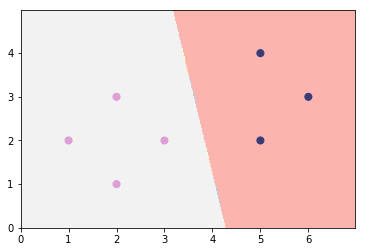

In [6]:
model = RidgeClassifier()
model.fit(seven_X, seven_y)
h = lambda x : model.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(seven_X, seven_y, h)

hr = model.predict(seven_X)

print(accuracy_score(seven_y, hr))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


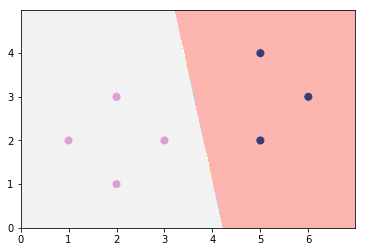

In [7]:
model = LinearRegression()
model.fit(seven_X, seven_y)

h = lambda x : model.predict(x) >= 0.5

_h = model.predict(seven_X)

fixedH = [int(round(x)) for x in _h]

mlutils.plot_2d_clf_problem(seven_X, seven_y, h)

print(accuracy_score(seven_y, fixedH))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

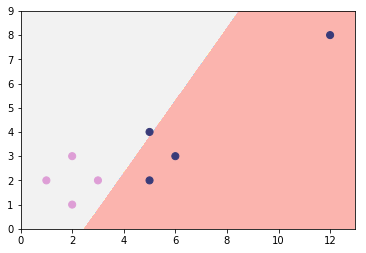

In [9]:
model = RidgeClassifier()
model.fit(outlier_X, outlier_y)
h = lambda x : model.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

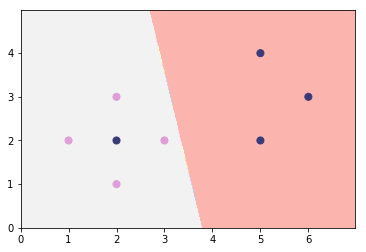

In [11]:
model = RidgeClassifier()
model.fit(unsep_X, unsep_y)
h = lambda x : model.predict(x) >= 0.5

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

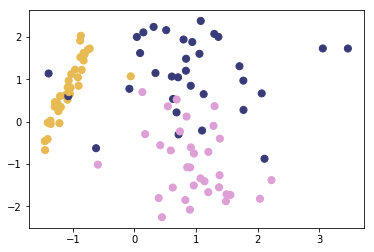

In [12]:
from sklearn.datasets import make_classification

_X, _y = make_classification(n_features = 2, n_informative = 2, n_classes = 3, n_redundant = 0, n_clusters_per_class = 1)

mlutils.plot_2d_clf_problem(_X, _y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

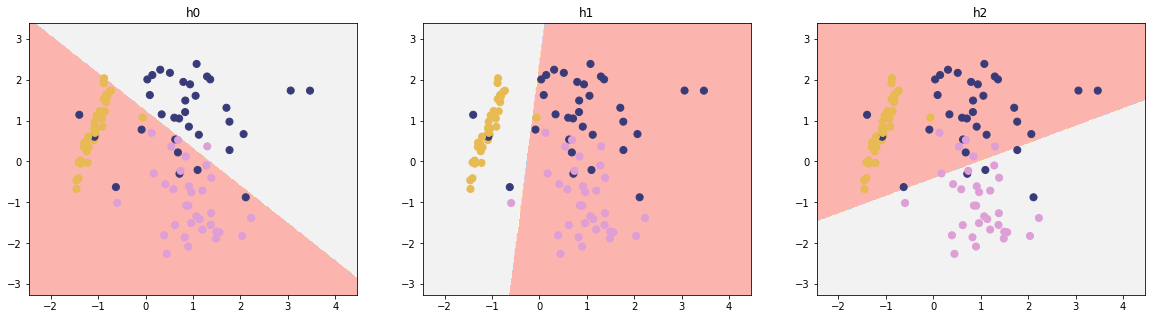

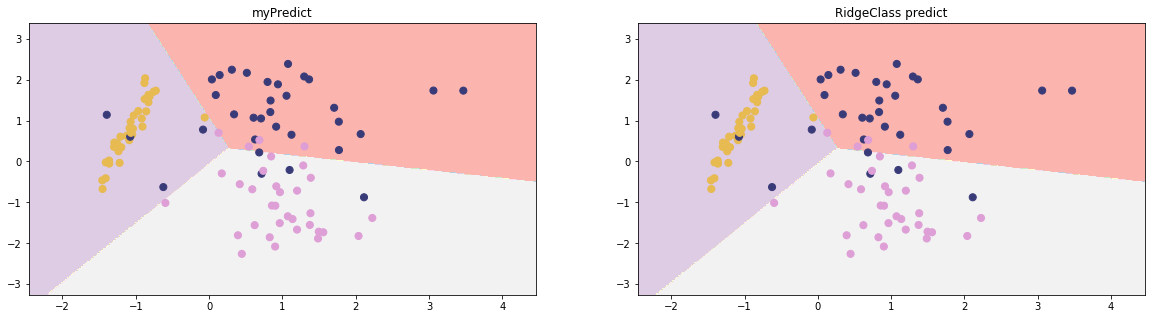

In [13]:
_y0 = []
_y1 = []
_y2 = []

for y in _y:
    if y == 0:
        _y0.append(1)
        _y1.append(0)
        _y2.append(0)
    elif y == 1:
        _y0.append(0)
        _y1.append(1)
        _y2.append(0)
    else:
        _y0.append(0)
        _y1.append(0)
        _y2.append(1)

model0 = LinearRegression()
model0.fit(_X, _y0)

model1 = LinearRegression()
model1.fit(_X, _y1)

model2 = LinearRegression()
model2.fit(_X, _y2)

h = lambda x: np.argmax([model0.predict(x.reshape(1,-1)), model1.predict(x.reshape(1,-1)), model2.predict(x.reshape(1,-1))])

plt.figure(figsize= (20, 5))
h2_0 = lambda x: model0.predict(x) >= 0.5
h2_1 = lambda x: model1.predict(x) >= 0.5
h2_2 = lambda x: model2.predict(x) >= 0.5
plt.subplot(1,3,1)
mlutils.plot_2d_clf_problem(_X, _y, h2_0)
plt.title("h0")
plt.subplot(1,3,2)
mlutils.plot_2d_clf_problem(_X, _y, h2_1)
plt.title("h1")
plt.subplot(1,3,3)
mlutils.plot_2d_clf_problem(_X, _y, h2_2)
plt.title("h2")

plt.figure(figsize= (20, 5))
plt.subplot(1,2,1)
mlutils.plot_2d_clf_problem(_X, _y, h)
plt.title("myPredict")

r_model = RidgeClassifier(alpha=0)
r_model.fit(_X, _y)
h2 = lambda x: r_model.predict(x)
plt.subplot(1,2,2)
mlutils.plot_2d_clf_problem(_X, _y, h2)
plt.title("RidgeClass predict")

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

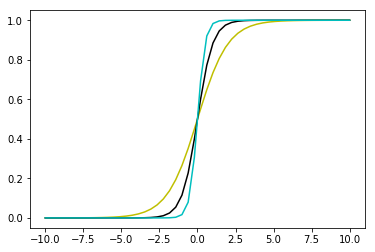

In [14]:
def sigmoid(x, a=1):
    return 1/(1 + exp(-a*x))

x = linspace(-10,10)

plt.plot(x, sigmoid(x,1), c = 'y')
plt.plot(x, sigmoid(x,2), c = 'k')
plt.plot(x, sigmoid(x,4), c = 'c')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [17]:
import scipy
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    fi = PolynomialFeatures(1).fit_transform(x.reshape(1,-1))
    return sigmoid(fi.dot(w))

def cross_entropy_error(X, y, w):
    fi = PolynomialFeatures(1).fit_transform(X)
    return sklearn.metrics.log_loss(y, sigmoid(fi.dot(w)))

def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    wTil = zeros(len(X[1]) + 1)
    retTrace = [];
    initErr = epsilon**-1
    
    for i in range(0, max_iter):
        dw0 = 0
        dw = zeros(len(X[1]))
        err = 0
        
        for j in range(0, len(X)):
            h = lr_h(X[j], wTil)
            dw0 += h - y[j]
            dw += (h - y[j])*X[j]
            
            loss = -y[j] * scipy.log(h) - (1 - y[j]) * scipy.log(1 - h)
            
            err += loss
            
        if abs(initErr - err) < epsilon: 
            print("break on: ", i)
            break
        else: initErr = err
            
        wTil[0] -= eta*dw0
        wTil[1:] = wTil[1:] * (1-eta*alpha) - eta*dw
        
        retTrace.extend(wTil)
        
    return (wTil, retTrace) if trace else wTil

    

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

0.0775171825249
[ 6.44150959 -2.11012128  0.53522851]


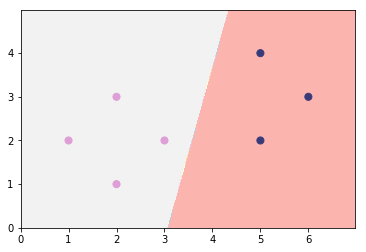

In [18]:
w3c = lr_train(seven_X, seven_y)
print (cross_entropy_error(seven_X, seven_y, w3c))
print (w3c)

h3c = lambda x: lr_h(x, w3c) >= 0.5

figure()
mlutils.plot_2d_clf_problem(seven_X, seven_y, h3c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

[ 6.44150959 -2.11012128  0.53522851]
break on:  1544
break on:  1128


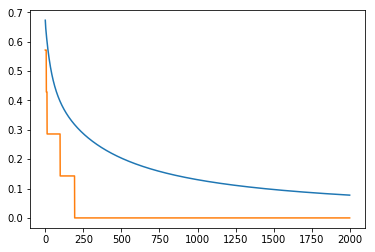

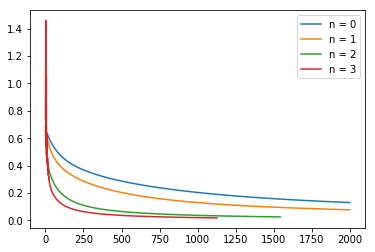

In [19]:
eta = [0.005, 0.01, 0.05, 0.1]

[w3d, trace] = lr_train(seven_X, seven_y, trace=True)
print (w3d)

fi = PolynomialFeatures(1).fit_transform(seven_X)
h3d = lambda x: x >= 0.5

crossEntErr = []
zeroOneErr = []

limit = len(trace)

for i in range(0, limit, 3):
    crossEntErr.append(cross_entropy_error(seven_X, seven_y, trace[i:i+3]))
    zeroOneErr.append(sklearn.metrics.zero_one_loss(seven_y, h3d(sigmoid(fi.dot(trace[i:i+3])))))

figure()
plt.plot(crossEntErr)
plt.plot(zeroOneErr)


diffEtaErr = []

for el in eta:
    tmp = []
    [_, traceTmp] = lr_train(seven_X, seven_y, el, trace=True)
    
    limitTmp = len(traceTmp)
    for j in range(0, limitTmp, 3):
        tmp.append(cross_entropy_error(seven_X, seven_y, traceTmp[j:j+3]))
    
    diffEtaErr.append(tmp)
    
figure()
limitEta = len(eta)
for i in range(0, limitEta):
    plt.plot(diffEtaErr[i], label = 'n = ' + str(i))
legend(loc = 'best')


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

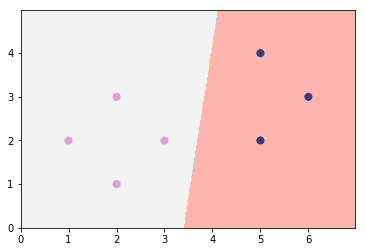

In [20]:
from sklearn.linear_model import LogisticRegression

logReg3 = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1)
logReg3.fit(seven_X, seven_y)
h3e = lambda x : logReg3.predict(x)

mlutils.plot_2d_clf_problem(seven_X, seven_y, h3e)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

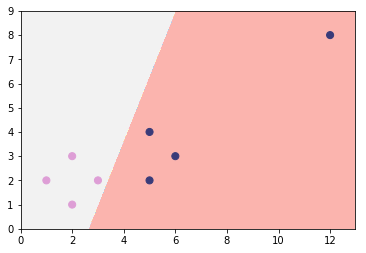

In [21]:
logReg = LogisticRegression(max_iter=2000, tol=0.001, C=0.09**-1)
logReg.fit(outlier_X, outlier_y)
h4 = lambda x : logReg.predict(x)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h4)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


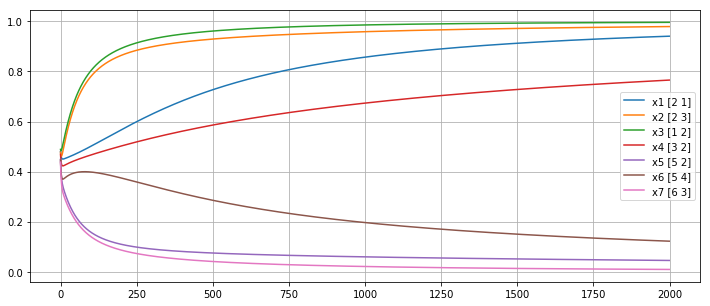

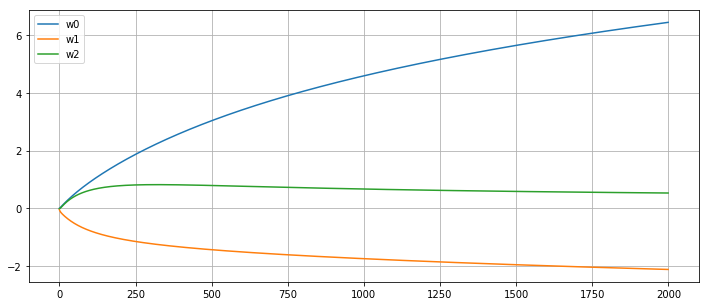

In [22]:
log_reg = LogisticRegression()

[w4b, trace4b] = lr_train(seven_X, seven_y, trace = True)

h4b = []

for i in range(0, len(seven_X)):
    h = []

    for j in range(0, len(trace4b), 3):
        h.append(lr_h(seven_X[i], trace4b[j:j+3]))
        
    h4b.append(h)
    
plt.figure(figsize = (12,5))
plt.grid()

for i in range(0, len(h4b)):
    plt.plot(h4b[i], label = 'x%d ' % (i+1) + str(seven_X[i]))
legend(loc = 'best')

w0 = []
w1 = []
w2 = []

for i in range(0, len(trace4b), 3):
    w0.append(trace4b[i])
    w1.append(trace4b[i+1])
    w2.append(trace4b[i+2])
    
plt.figure(figsize = (12,5))
plt.grid()
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
legend(['w0', 'w1', 'w2'], loc = 'best')


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

break on:  1315


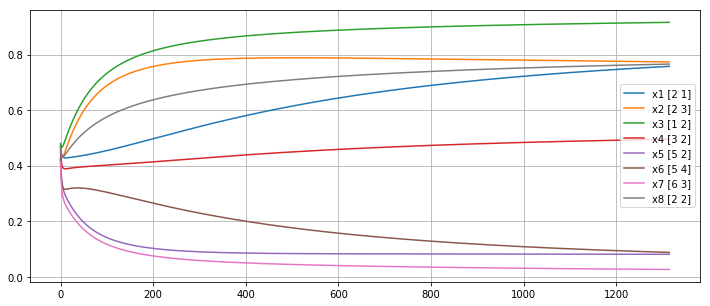

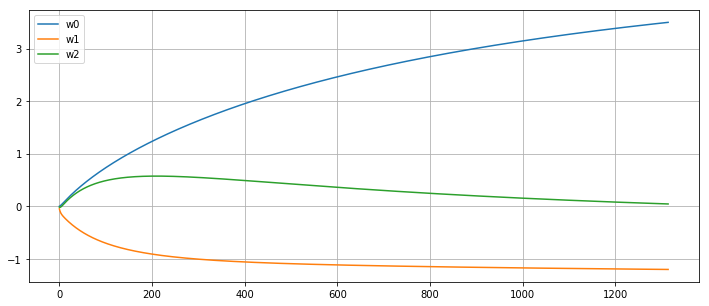

In [23]:
log_reg = LogisticRegression()

[w4b, trace4b] = lr_train(unsep_X, unsep_y, trace = True)

h4b = []

for i in range(0, len(unsep_X)):
    h = []

    for j in range(0, len(trace4b), 3):
        h.append(lr_h(unsep_X[i], trace4b[j:j+3]))
        
    h4b.append(h)
    
plt.figure(figsize = (12,5))
plt.grid()

for i in range(0, len(h4b)):
    plt.plot(h4b[i], label = 'x%d ' % (i+1) + str(unsep_X[i]))
legend(loc = 'best')

w0 = []
w1 = []
w2 = []

for i in range(0, len(trace4b), 3):
    w0.append(trace4b[i])
    w1.append(trace4b[i+1])
    w2.append(trace4b[i+2])
    
plt.figure(figsize = (12,5))
plt.grid()
plt.plot(w0)
plt.plot(w1)
plt.plot(w2)
legend(['w0', 'w1', 'w2'], loc = 'best')


### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [24]:
from numpy.linalg import norm

break on:  772
break on:  230


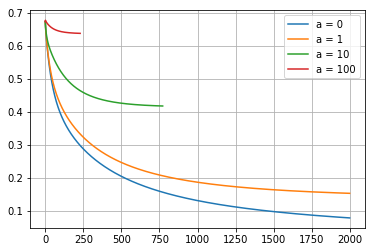

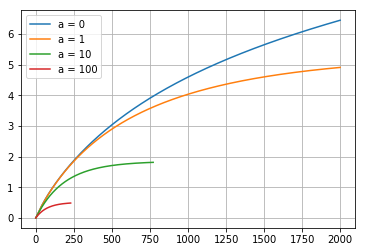

In [25]:
alfa = [0, 1, 10, 100]

crossEntErr5 = []
wNorm = []

for a in alfa:
    (w5, trace5) = lr_train(seven_X, seven_y, alpha = a, trace = True)
    err_ = []
    norm_ = []
    
    for i in range(0, len(trace5), 3):
        err_.append(cross_entropy_error(seven_X, seven_y, trace5[i:i+3]))
        norm_.append(linalg.norm(trace5[i:i+1]))
    
    crossEntErr5.append(err_)
    wNorm.append(norm_)
    
plt.figure()
plt.grid()
for i in range(0, len(crossEntErr5)):
    plt.plot(crossEntErr5[i], label = 'a = '  + str(alfa[i])  )
legend(loc = 'best')

plt.figure()
plt.grid()
for i in range(0, len(wNorm)):
    plt.plot(wNorm[i], label = 'a = ' + str(alfa[i]) ) 
legend(loc = 'best')

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [26]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

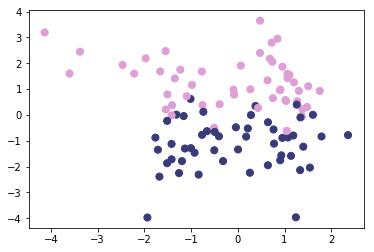

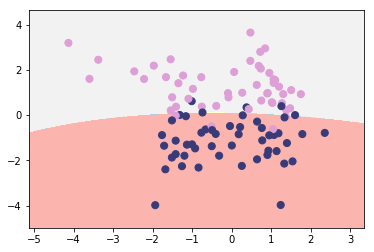

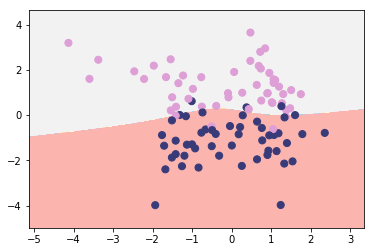

In [27]:
X6a, y6a = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

figure()
mlutils.plot_2d_clf_problem(X6a, y6a)

for i in range(2, 4):
    poly_6 = PolynomialFeatures(i)
    fi_6 = poly_6.fit_transform(X6a)
    model_6 = LogisticRegression()
    log_reg_6 = model_6.fit(fi_6, y6a)
    h_6 = lambda x: model_6.predict(poly_6.transform(x))
    plt.figure()
    mlutils.plot_2d_clf_problem(X6a, y6a, h_6)


**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?